In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
data = pd.read_csv('video-properties.csv')
data.head()


,vid_id,width,length,frames,fps
0,69241,1280.0,1280.0,75.0,29.97003
1,65225,0.0,0.0,0.0,0.00000
2,68011,636.0,636.0,55.0,29.97003
3,68208,0.0,0.0,0.0,0.00000
4,68012,1280.0,1280.0,113.0,30.00000


In [39]:
# Infer time.
data['seconds'] = data['frames'] / data['fps']
data.head()


,vid_id,width,length,frames,fps,seconds
0,69241,1280.0,1280.0,75.0,29.97003,2.502500
1,65225,0.0,0.0,0.0,0.00000,NaN
2,68011,636.0,636.0,55.0,29.97003,1.835167
3,68208,0.0,0.0,0.0,0.00000,NaN
4,68012,1280.0,1280.0,113.0,30.00000,3.766667


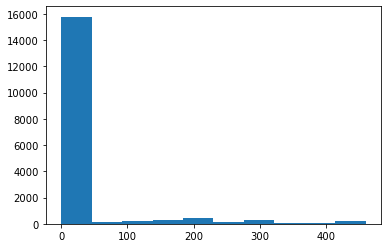

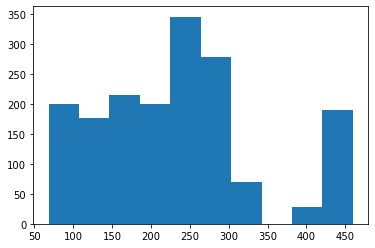

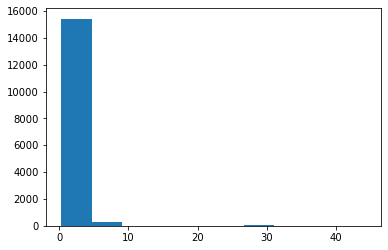

Percent 10 or below: 0.7448655314708533
Percent above 10: 0.08428591756391406
Percent null: 0.17084855096523266


In [40]:
# Seconds.
plt.hist(data['seconds'])
plt.show()

plt.hist(data.loc[data['seconds'] > 60, 'seconds'])
plt.show()

plt.hist(data.loc[data['seconds'] <= 60, 'seconds'])
plt.show()

print(f"Percent 10 or below: {np.mean(data['seconds'] <= 10)}")

print(f"Percent above 10: {np.mean(data['seconds'] > 10)}")

print(f"Percent null: {data['seconds'].isna().mean()}")


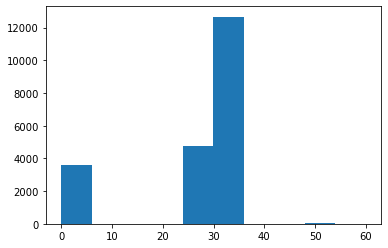

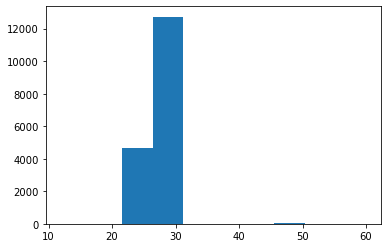

Percent nonzero: 0.8291514490347673
Percent 20-40: 0.9966323578238391
Percent null: 0.0


In [41]:
# fps.
plt.hist(data['fps'])
plt.show()

plt.hist(data.loc[data['fps'] != 0, 'fps'])
plt.show()

print(f"Percent nonzero: {np.mean(data['fps'] != 0)}")

print(f"Percent 20-40: {np.mean(data['fps'] > 20) and np.mean(data['fps'] < 40)}")

print(f"Percent null: {data['fps'].isna().mean()}")


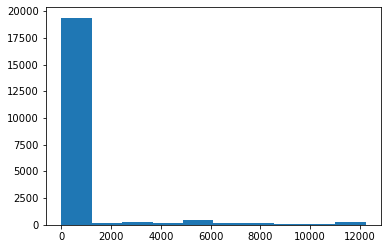

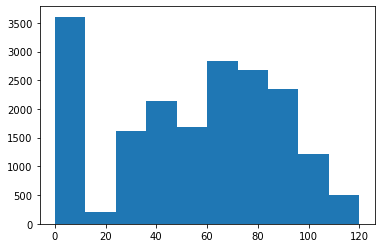

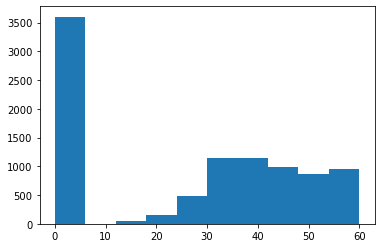

Percent 10 or below: 0.1709434141251245
Percent below 60: 0.44566712517193946
Percent null: 0.0


In [42]:
# Frames.
plt.hist(data['frames'])
plt.show()

plt.hist(data.loc[data['frames'] <= 120, 'frames'])
plt.show()

plt.hist(data.loc[data['frames'] <= 60, 'frames'])
plt.show()

print(f"Percent 10 or below: {np.mean(data['frames'] <= 10)}")

print(f"Percent below 60: {np.mean(data['frames'] <= 60)}")

print(f"Percent null: {data['frames'].isna().mean()}")


In [43]:
data_filtered = data.loc[
    (data['seconds'] <= 10)
    &
    ~(data['seconds'].isna())
    &
    (data['fps'] > 20)
    &
    (data['fps'] < 40)
    &
    (data['frames'] <= 120)
]

data_filtered.shape

(15197, 6)

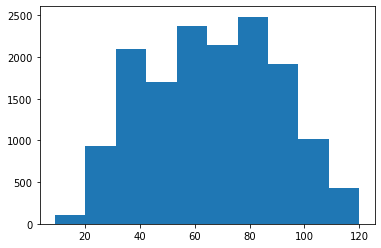

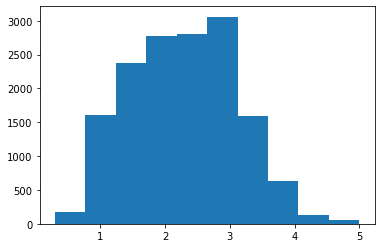

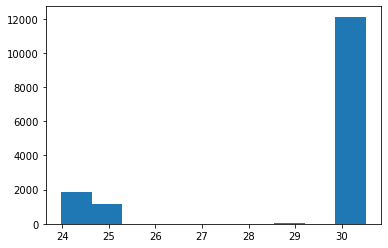

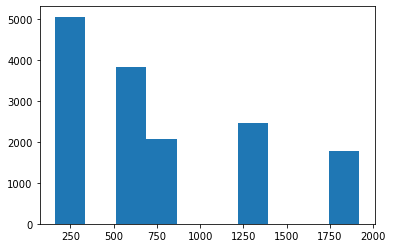

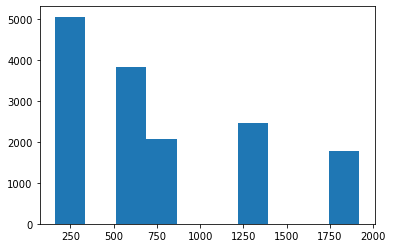

In [44]:
plt.hist(data_filtered['frames'])
plt.show()

plt.hist(data_filtered['seconds'])
plt.show()

plt.hist(data_filtered['fps'])
plt.show()

plt.hist(data_filtered['width'])
plt.show()

plt.hist(data_filtered['length'])
plt.show()


In [45]:
data_filtered.shape[0] / data.shape[0]


0.7208177204382678

In [46]:
data_filtered.isna().sum()


vid_id     0
width      0
length     0
frames     0
fps        0
seconds    0
dtype: int64

In [47]:
data_filtered.to_csv('data-filtered.csv', index=False)
